## Load modified images (cropped and resized)

In [1]:
import os
import numpy as np

# defining global variable path
image_path = "./images_training_rev1/new_images"

#function to load folder into arrays and then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')])
 
    return image_files

In [2]:
data_img= loadImages(image_path)

In [14]:
data_img

['./images_training_rev1/new_images\\100008.jpg',
 './images_training_rev1/new_images\\100023.jpg',
 './images_training_rev1/new_images\\100053.jpg',
 './images_training_rev1/new_images\\100078.jpg',
 './images_training_rev1/new_images\\100090.jpg',
 './images_training_rev1/new_images\\100122.jpg',
 './images_training_rev1/new_images\\100123.jpg',
 './images_training_rev1/new_images\\100128.jpg',
 './images_training_rev1/new_images\\100134.jpg',
 './images_training_rev1/new_images\\100143.jpg',
 './images_training_rev1/new_images\\100150.jpg',
 './images_training_rev1/new_images\\100157.jpg',
 './images_training_rev1/new_images\\100187.jpg',
 './images_training_rev1/new_images\\100204.jpg',
 './images_training_rev1/new_images\\100237.jpg',
 './images_training_rev1/new_images\\100259.jpg',
 './images_training_rev1/new_images\\100263.jpg',
 './images_training_rev1/new_images\\100288.jpg',
 './images_training_rev1/new_images\\100295.jpg',
 './images_training_rev1/new_images\\100322.jpg',


In [3]:
import cv2
img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data_img]
print(img[0].shape)

(64, 64, 3)


In [4]:
img = np.asarray(img)

In [5]:
img.shape

(61578, 64, 64, 3)

In [4]:
import pandas as pd
data = pd.read_csv('class1.csv', index_col=0)
data #= data[:10000]

,Class1.1,Class1.2,Class1.3
GalaxyID,,,
100008,0.383147,0.616853,0.000000
100023,0.327001,0.663777,0.009222
100053,0.765717,0.177352,0.056931
100078,0.693377,0.238564,0.068059
100090,0.933839,0.000000,0.066161
...,...,...,...
999948,0.510379,0.489621,0.000000
999950,0.901216,0.098784,0.000000
999958,0.202841,0.777376,0.019783


In [5]:
data.shape

(61578, 3)

In [8]:
import numpy as np

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(img, data, test_size=.2, random_state=15)
print(X_train.shape)
print(y_train.shape)

(49262, 64, 64, 3)
(49262, 3)


## 1-CNN model 

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
#tf.random.set_seed(seed)

model = Sequential([
  Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  #Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),

  Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  #Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
    
  Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  #Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
  
  Conv2D(32, (1,1), strides=1, input_shape=(64, 64, 3), activation='elu'),
  Dropout(0.4),  
    
  
  Flatten(),
  Dense(3, activation='softmax'),  #3= category for the three type of images
    
])

C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Utilisateur\Anacond

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [10]:
import keras
# Set Optimizer
#opt = adam(lr=0.001)
learning_rate = 0.01
model.compile(
  'RMSprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  #optimizer=SGD(lr=learning_rate)
)

In [11]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

history = model.fit(
  X_train,
  y_train,
  epochs=20,
  validation_data=(X_val, y_val),
  batch_size=X_train.shape[1] #Put 1 to take 64 the dimension of the images
)

Instructions for updating:
Use tf.cast instead.
Train on 49262 samples, validate on 12316 samples
Epoch 1/20
49262/49262 [==============================] - 105s 2ms/step - loss: 1.0085 - acc: 0.6906 - val_loss: 0.7382 - val_acc: 0.7449
Epoch 2/20
49262/49262 [==============================] - 105s 2ms/step - loss: 0.7186 - acc: 0.7613 - val_loss: 0.7727 - val_acc: 0.7187
Epoch 3/20
49262/49262 [==============================] - 104s 2ms/step - loss: 0.7121 - acc: 0.7684 - val_loss: 0.7078 - val_acc: 0.7806
Epoch 4/20
49262/49262 [==============================] - 105s 2ms/step - loss: 0.7095 - acc: 0.7709 - val_loss: 0.7084 - val_acc: 0.7764
Epoch 5/20
49262/49262 [==============================] - 106s 2ms/step - loss: 0.7072 - acc: 0.7758 - val_loss: 0.7138 - val_acc: 0.7729
Epoch 6/20
49262/49262 [==============================] - 110s 2ms/step - loss: 0.7053 - acc: 0.7779 - val_loss: 0.7019 - val_acc: 0.7835
Epoch 7/20
49262/49262 [==============================] - 104s 2ms/step - 

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        4640      
__________

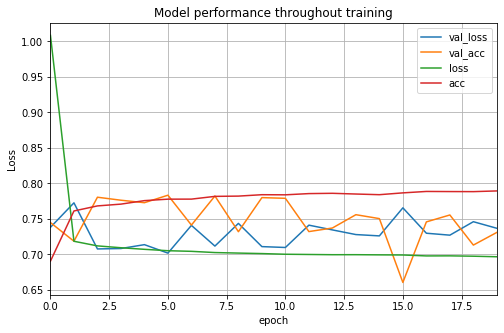

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
prediction = model.predict(X_val)
print(np.argmax(prediction, axis=1))

[1 1 0 ... 1 1 0]


In [15]:
np.array(y_val).argmax(axis=1)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

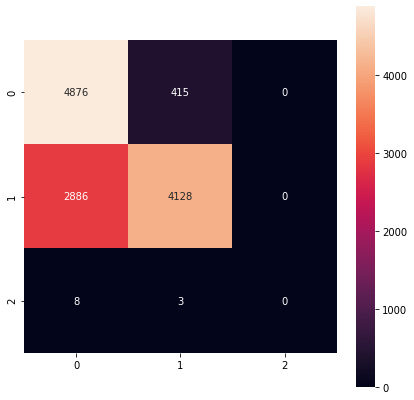

Accuracy: 0.7310815199740175


In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_class = np.array(y_val).argmax(axis=1)
y_pred_class = np.argmax(prediction, axis=1)
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy:',accuracy_score(y_train_class, y_pred_class))


Accuracy 0.7945 on 10000 images <br>
Accuracy: 0.7310815199740175 on the total dataset